README

The only dependencies that are required are the following libraries: NumPy, Pandas, Scikit-Learn, and Matplotlib.

The notebook needs the following files to run: Assignment4_Data.xlsx.

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Conditional Probability Distribution for all of the feautures given that the house is a apartment, house, or condo
conditional_probability_distribution = [[(7.333, 3.348), (5.761, 0.528), (7.416, 4.209)], [(1.286, 0.525), (1.071, 0.175), (1.333, 0.553)], [(6.104, 3.017), (6.631, 2.082), (6.025, 2.323)],
 [(1.505, 0.652), (1.392, 0.197), (1.553, 0.843)], [(1.214, 0.647), (1.071, 0.776), (1.333, 0.471)], [(6.857, 1.245), (6.143, 0.639), (6.833, 1.462)], [(3.429, 0.904), (3, 0.535), (3.333, 0.745)],
  [(38.714, 13.593), (34.286, 11.780), (39.667, 12.737)]]

# Prior Probabilities of a house being an apartment, house, or condo
prior_probabilities = [0.35, 0.35, 0.3]

# Maps indices to a classification
classes_map = {0:"Apartment", 1:"House", 2:"Condo"}

# Returns the guassian likelihood using the attribute value, mean, and standard deviation
def guassian_likelihood(attribute_value, feature, class_type):
  mean, standard_deviation = conditional_probability_distribution[feature][class_type]
  likelihood = (1 / (np.sqrt(2 * np.pi) * standard_deviation)) * np.exp(-np.power(attribute_value - mean, 2) / (2 * np.power(standard_deviation, 2)))
  return likelihood

# Returns the probabilities that a given feature vector is classified as a apartment, house, or condo
def probabilities_calculation(feature_vector):

  probabilities_of_classes = np.zeros((3,))

  for i in range(3):

    probability_of_class = 1
    for j in range(8):
      probability_of_class *= guassian_likelihood(feature_vector[j], j, i)

    probability_of_class *= prior_probabilities[i]
    probabilities_of_classes[i] = probability_of_class

  return probabilities_of_classes

# Computes the accuracy of the predictions of the different examples
def naive_bayes(x_test, y_test):

  correct_classifications = 0

  for i in range(len(x_test)):
    correct = True
    house_id = x_test[i][0]
    probabilities_of_classes = probabilities_calculation(x_test[i, 1:])

    max_index = np.argmax(probabilities_of_classes)
    classification = classes_map[max_index]

    if classification == y_test[i]:
      correct_classifications += 1
    else:
      correct = False

    print("MAP classification of house " + str(house_id) +".")
    print("Automobile - " + str(probabilities_of_classes[0]))
    print("House - " + str(probabilities_of_classes[1]))
    print("Condo - " + str(probabilities_of_classes[2]))
    print("House " + str(house_id) + " was classified as " + str(classification) + ".")

    if correct:
      print("House " + str(house_id) + " was classified correctly.")
    else:
      print("House " + str(house_id) + " was classified incorrectly.")

  accuracy = correct_classifications / len(x_test)
  print('The accuracy is ' + str(accuracy) + ".")

**Question 1**

1.


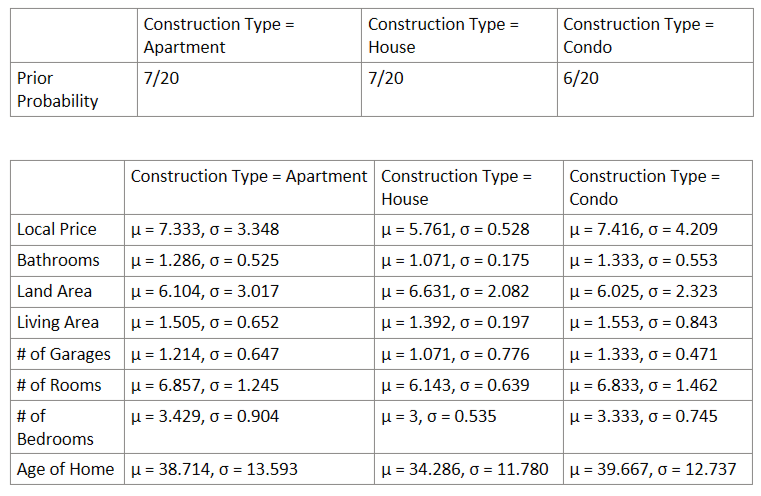

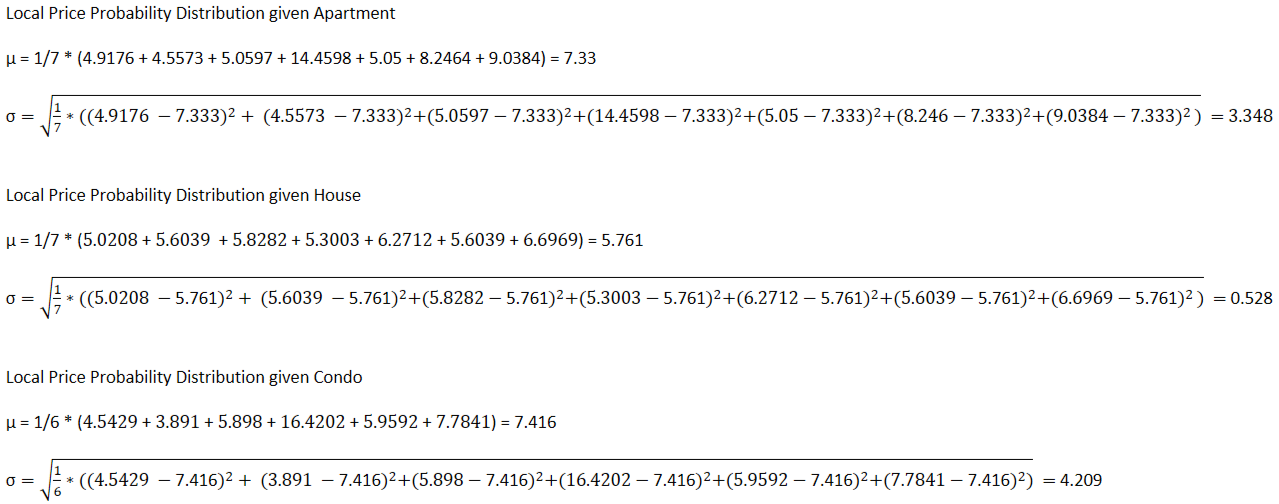

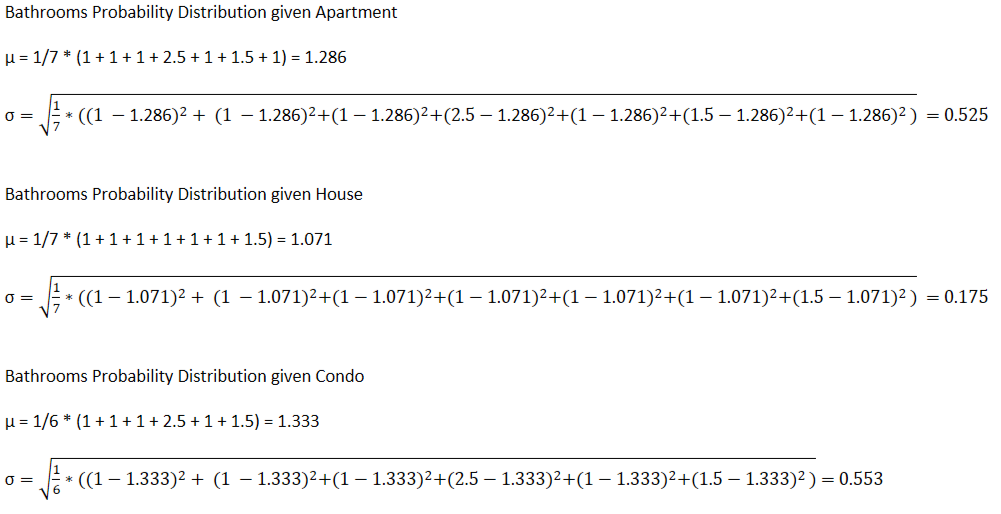

To find my conditional probability distributions of each feature, I found the mean and standard deviation of each feature given that it is an Apartment, House, or Condo. For every feature I found three conditional distributions each corresponding to one of the three classes. For example if I was to find the conditional distribution of Local Price given that it is an Apartment, I would look through all my training examples that were classified as an Apartment. Once I retrived those examples I will take the average of all the Local Price values across these examples to find my mean. I will also use these values across examples to find my standard deviation.

In [3]:
# Load the training data
training_data = pd.read_excel("Asssignment4_Data.xlsx", sheet_name = 0)

# Convert into a numpy matrix
training_data = training_data.values

# Separate the training features from the training labels
x_train = training_data[:, :-1]
y_train = training_data[:, -1]

# Load the test data
test_data = pd.read_excel("Asssignment4_Data.xlsx", sheet_name = 1)

# Convert into a numpy matrix
test_data = test_data.values

# Separate the testing features from the testing labels
x_test = test_data[:, :-1]
y_test = test_data[:, -1]


In [4]:
# Run the naive bayes function
naive_bayes(x_test, y_test)

MAP classification of house 24.
Automobile - 3.3303614147322506e-06
House - 2.2282582942873404e-05
Condo - 3.1537494684223957e-06
House 24 was classified as House.
House 24 was classified incorrectly.
MAP classification of house 25.
Automobile - 6.454741794099814e-07
House - 2.308895823803958e-14
Condo - 3.392758742711634e-07
House 25 was classified as Apartment.
House 25 was classified incorrectly.
MAP classification of house 26.
Automobile - 6.066933274066829e-08
House - 2.730509915891031e-10
Condo - 1.9332987934492862e-08
House 26 was classified as Apartment.
House 26 was classified incorrectly.
MAP classification of house 27.
Automobile - 1.7604812595114273e-06
House - 1.9626136968520225e-17
Condo - 1.667720684320468e-06
House 27 was classified as Apartment.
House 27 was classified correctly.
MAP classification of house 28.
Automobile - 5.258903366755149e-07
House - 9.19285531970887e-36
Condo - 6.001652840659304e-07
House 28 was classified as Condo.
House 28 was classified incorrec

**Question 1**

2. The code above calls my Naive Bayes function for the testing data.

In [5]:
# Remove House ID feature from both testing and training data
x_train = x_train[:, 1:]
x_test = x_test[:, 1:]

In [6]:
# Training and Testing using a decision tree with defualt hyper parameters

# Initialize the decision tree classifier
decision_tree_model = DecisionTreeClassifier()

# Train the model on the training data
decision_tree_model.fit(x_train, y_train)

# Predict the labels for the training set
y_predictions = decision_tree_model.predict(x_train)

# Calculate the accuracy for the training set
accuracy = accuracy_score(y_train, y_predictions)
print("Training Accuracy:", accuracy)

# Predict the labels for test set
y_predictions = decision_tree_model.predict(x_test)

# Calculate the accuracy for testing
accuracy = accuracy_score(y_test, y_predictions)
print("Testing Accuracy:", accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.4


**Question 2**

1a. The training accuracy using the default parameters is 100%.

1b. The testing accuracy using the defualt parameters is 40%.

In [7]:
# Training and Testing using a decision tree with depth set to 2
# Initialize the decision tree classifier
decision_tree_model = DecisionTreeClassifier(max_depth=2)

# Train the model on the training data
decision_tree_model.fit(x_train, y_train)

# Predict the labels for the training set
y_predictions = decision_tree_model.predict(x_train)

# Calculate the accuracy for the training set
accuracy = accuracy_score(y_train, y_predictions)
print("Training Accuracy:", accuracy)

# Predict the labels for test set
y_predictions = decision_tree_model.predict(x_test)

# Calculate the accuracy for testing
accuracy = accuracy_score(y_test, y_predictions)
print("Testing Accuracy:", accuracy)

Training Accuracy: 0.75
Testing Accuracy: 0.8


In [8]:
# Training and Testing using a decision tree with depth set to 3
# Initialize the decision tree classifier
decision_tree_model = DecisionTreeClassifier(max_depth=3)

# Train the model on the training data
decision_tree_model.fit(x_train, y_train)

# Predict the labels for the training set
y_predictions = decision_tree_model.predict(x_train)

# Calculate the accuracy for the training set
accuracy = accuracy_score(y_train, y_predictions)
print("Training Accuracy:", accuracy)

# Predict the labels for test set
y_predictions = decision_tree_model.predict(x_test)

# Calculate the accuracy for testing
accuracy = accuracy_score(y_test, y_predictions)
print("Testing Accuracy:", accuracy)

Training Accuracy: 0.9
Testing Accuracy: 0.4


In [9]:
# Training and Testing using a decision tree with depth set to 4
# Initialize the decision tree classifier
decision_tree_model = DecisionTreeClassifier(max_depth=4)

# Train the model on the training data
decision_tree_model.fit(x_train, y_train)

# Predict the labels for the training set
y_predictions = decision_tree_model.predict(x_train)

# Calculate the accuracy for the training set
accuracy = accuracy_score(y_train, y_predictions)
print("Training Accuracy:", accuracy)

# Predict the labels for test set
y_predictions = decision_tree_model.predict(x_test)

# Calculate the accuracy for testing
accuracy = accuracy_score(y_test, y_predictions)
print("Testing Accuracy:", accuracy)

Training Accuracy: 0.95
Testing Accuracy: 0.4


In [10]:
# Training and Testing using a decision tree with depth set to 6
# Initialize the decision tree classifier
decision_tree_model = DecisionTreeClassifier(max_depth=6)

# Train the model on the training data
decision_tree_model.fit(x_train, y_train)

# Predict the labels for the training set
y_predictions = decision_tree_model.predict(x_train)

# Calculate the accuracy for the training set
accuracy = accuracy_score(y_train, y_predictions)
print("Training Accuracy:", accuracy)

# Predict the labels for test set
y_predictions = decision_tree_model.predict(x_test)

# Calculate the accuracy for testing
accuracy = accuracy_score(y_test, y_predictions)
print("Testing Accuracy:", accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.4


In [11]:
# Training and Testing using a decision tree with depth set to 8
# Initialize the decision tree classifier
decision_tree_model = DecisionTreeClassifier(max_depth=8)

# Train the model on the training data
decision_tree_model.fit(x_train, y_train)

# Predict the labels for the training set
y_predictions = decision_tree_model.predict(x_train)

# Calculate the accuracy for the training set
accuracy = accuracy_score(y_train, y_predictions)
print("Training Accuracy:", accuracy)

# Predict the labels for test set
y_predictions = decision_tree_model.predict(x_test)

# Calculate the accuracy for testing
accuracy = accuracy_score(y_test, y_predictions)
print("Testing Accuracy:", accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.4


**Question 2**

2. The effect of restricting the maximum depth of the tree is that you decrease the variance between the training and testing data. The higher my maximum depth is the more the variance increases. I experimented with the following values for my maximum depth: 2, 3, 4, 6, and 8. I got the best performance on the training set with using a maximum depth of 2. I got a training and testing accuracy of 0.75 and .8 respectively.

3. Restricting the depth has a strong effect on classifier performance because it keeps the model from overfitting which can prevent the model from having high variance between the training and testing data. When the maximum depth parameter is larger, it becomes more likely that the model captures specific patterns in the training set such as noise and outliers that do not necessarily apply to unseen data causing it to do poorly on testing data.

Training Accuracy: 0.75


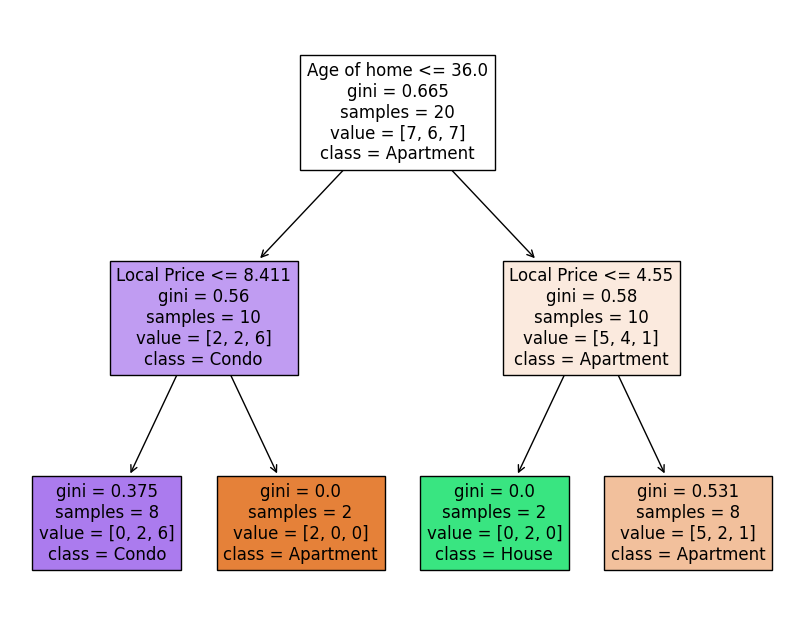

In [12]:
# Training and Testing using a decision tree with depth set to 2
# Initialize the decision tree classifier
decision_tree_model = DecisionTreeClassifier(max_depth=2)

# Train the model on the training data
decision_tree_model.fit(x_train, y_train)

# Predict the labels for the training set
y_predictions = decision_tree_model.predict(x_train)

# Calculate the accuracy for the training set
accuracy = accuracy_score(y_train, y_predictions)
print("Training Accuracy:", accuracy)

# Visualize the decision tree
plt.figure(figsize=(10, 8))
plot_tree(decision_tree_model, feature_names=["Local Price", "Bathrooms", "Land Area", "Living Area", "# Garages", "# Rooms", "# Bedrooms", "Age of home"], class_names=["Apartment", "House", "Condo"], filled=True)
plt.show()

**Question 2**

4. Using the visualisation above, the given example has a age of home of less than 36 as its age of home is 23, so we will go left from the root node. The next node is asking if we have a local price of less than 8.411 which is false. The local price is 9.0384 for this example so we will go right. Now we are at a leaf node which tells us that the given example is an **Apartment**.

In [13]:
# Convert the values into numpy float 64
x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

In [14]:

# K nearest neighbors function returns the accuracy of the majority vote predictions on the testing data
def KNN(x_train, y_train, x_test, y_test, k):

  accuracy = 0

  for i in range(len(x_test)):
    query_point = x_test[i]
    # Finds the euclidean distance between the query point and every point in the training data
    euclidean_distances = np.linalg.norm(x_train - query_point, axis = 1)

    # Gets the indices of the closest examples
    indices_of_closest_examples = np.argsort(euclidean_distances)[:k]

    # Retrieves the labels of the closest examples
    labels_of_closest_examples = y_train[indices_of_closest_examples]

    # Finds the label that appears the most in our K nearest neighbors
    counts_of_labels = Counter(labels_of_closest_examples)
    majority_label = counts_of_labels.most_common(1)[0][0]

    if y_test[i] == majority_label:
      accuracy += 1

  accuracy = accuracy / len(x_test)
  return accuracy


Testing Accuracy for 1 neighbor:  0.2
Testing Accuracy for 2 neighbors:  0.2
Testing Accuracy for 3 neighbors:  0.2
Testing Accuracy for 4 neighbors:  0.2
Testing Accuracy for 5 neighbors:  0.2


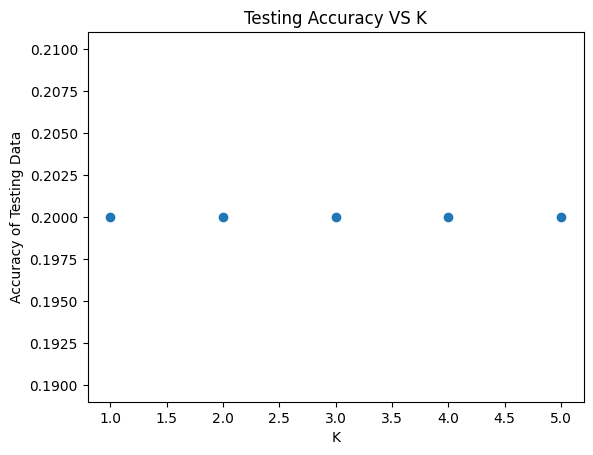

In [15]:
# Classifying the testing data using K nearest neighbors
# Plots accuracy vs K
# K varying from 1 to 5

different_K = np.zeros(5)
accuracy_for_different_K = np.zeros(5)

# Using 1 neighbor
accuracy = KNN(x_train, y_train, x_test, y_test, 1)
different_K[0] = 1
accuracy_for_different_K[0] = accuracy
print("Testing Accuracy for 1 neighbor: ", accuracy)

# Using 2 neighbors
accuracy = KNN(x_train, y_train, x_test, y_test, 2)
different_K[1] = 2
accuracy_for_different_K[1] = accuracy
print("Testing Accuracy for 2 neighbors: ", accuracy)

# Using 3 neighbors
accuracy = KNN(x_train, y_train, x_test, y_test, 3)
different_K[2] = 3
accuracy_for_different_K[2] = accuracy
print("Testing Accuracy for 3 neighbors: ", accuracy)

# Using 4 neighbors
accuracy = KNN(x_train, y_train, x_test, y_test, 4)
different_K[3] = 4
accuracy_for_different_K[3] = accuracy
print("Testing Accuracy for 4 neighbors: ", accuracy)

# Using 5 neighbors
accuracy = KNN(x_train, y_train, x_test, y_test, 5)
different_K[4] = 5
accuracy_for_different_K[4] = accuracy
print("Testing Accuracy for 5 neighbors: ", accuracy)


plt.scatter(different_K, accuracy_for_different_K)
plt.title("Testing Accuracy VS K")
plt.xlabel("K")
plt.ylabel("Accuracy of Testing Data")
plt.show()


Testing Accuracy for 6 neighbors:  0.4
Testing Accuracy for 8 neighbors:  0.4
Testing Accuracy for 10 neighbors:  0.4
Testing Accuracy for 12 neighbors:  0.4
Testing Accuracy for 14 neighbors:  0.4
Testing Accuracy for 16 neighbors:  0.2


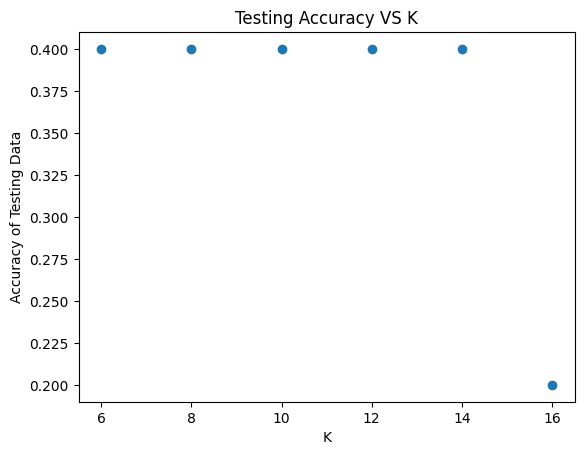

In [16]:
# Classifying the testing data using K nearest neighbors
# Plots accuracy vs K
# K varying from 6 to 16

different_K = np.zeros(6)
accuracy_for_different_K = np.zeros(6)

# Using 6 neighbors
accuracy = KNN(x_train, y_train, x_test, y_test, 6)
different_K[0] = 6
accuracy_for_different_K[0] = accuracy
print("Testing Accuracy for 6 neighbors: ", accuracy)

# Using 8 neighbors
accuracy = KNN(x_train, y_train, x_test, y_test, 8)
different_K[1] = 8
accuracy_for_different_K[1] = accuracy
print("Testing Accuracy for 8 neighbors: ", accuracy)

# Using 10 neighbors
accuracy = KNN(x_train, y_train, x_test, y_test, 10)
different_K[2] = 10
accuracy_for_different_K[2] = accuracy
print("Testing Accuracy for 10 neighbors: ", accuracy)

# Using 12 neighbors
accuracy = KNN(x_train, y_train, x_test, y_test, 12)
different_K[3] = 12
accuracy_for_different_K[3] = accuracy
print("Testing Accuracy for 12 neighbors: ", accuracy)

# Using 14 neighbors
accuracy = KNN(x_train, y_train, x_test, y_test, 14)
different_K[4] = 14
accuracy_for_different_K[4] = accuracy
print("Testing Accuracy for 14 neighbors: ", accuracy)

# Using 16 neighbors
accuracy = KNN(x_train, y_train, x_test, y_test, 16)
different_K[5] = 16
accuracy_for_different_K[5] = accuracy
print("Testing Accuracy for 16 neighbors: ", accuracy)


plt.scatter(different_K, accuracy_for_different_K)
plt.title("Testing Accuracy VS K")
plt.xlabel("K")
plt.ylabel("Accuracy of Testing Data")
plt.show()



**Question 3**

When ranging K from 1 to 5, I am getting the same accuracy across the board for the testing data. I am getting an accuracy of 20%. After getting these results, I decided that my K might not be large enough. I then decided to vary my K from 6 to 16 in increments of 2 which resulted in the same accuracy across the board as well for the different K values except for when my K value was set to 16. I got an accuracy of 40% on the testing data when my K was set between 6 to 14 inclusive. If I choose any K values higher than 14, I end up getting an accuracy of 20%.